Epoch 1/10


C:\Users\NOITE-CITHA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.3542 - loss: 1.2479 - val_accuracy: 0.3500 - val_loss: 1.0982
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3226 - loss: 1.1025 - val_accuracy: 0.3500 - val_loss: 1.0984
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3032 - loss: 1.1016 - val_accuracy: 0.3500 - val_loss: 1.0985
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3830 - loss: 1.0981 - val_accuracy: 0.3500 - val_loss: 1.0983
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3641 - loss: 1.0979 - val_accuracy: 0.3500 - val_loss: 1.0982
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3700 - loss: 1.0975 - val_accuracy: 0.3500 - val_loss: 1.0981
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.3489 - loss: 1.0981 - val_accuracy: 0.3500 - val_loss: 1.0980
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.3210 - loss: 1.0994 - val_accuracy: 0.3500 - val_loss: 1.

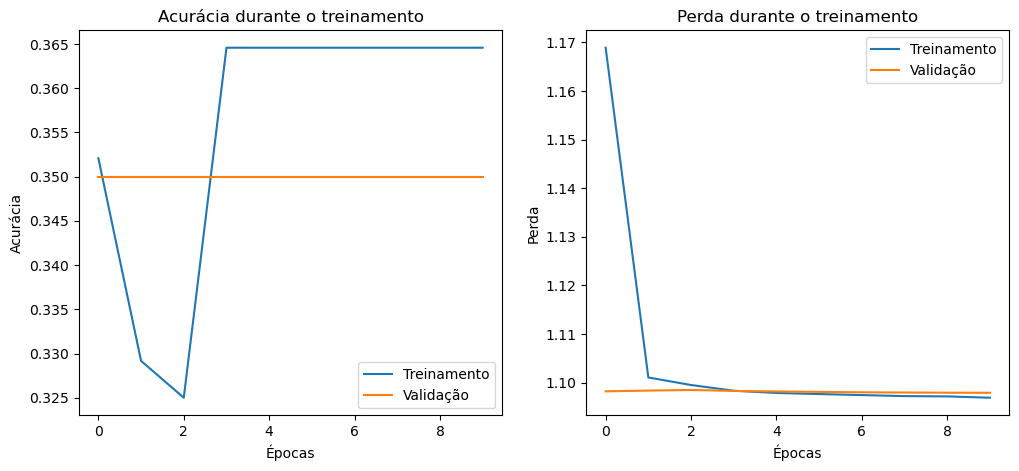

In [1]:
# Importando bibliotecas necessárias
import tensorflow as tf                      # Biblioteca principal para redes neurais
from tensorflow.keras import layers, models  # Camadas e modelo sequencial
import numpy as np                           # Para manipulação de arrays
import matplotlib.pyplot as plt              # Para visualização de resultados

# Simulação de dados: vamos criar dados artificiais para fins didáticos
# Em um caso real, você usaria imagens de satélite reais, provavelmente via pastas
num_classes = 3           # Suponha que temos 3 tipos de árvores
image_height = 64         # Altura da imagem
image_width = 64          # Largura da imagem
channels = 3              # 3 canais (RGB)

# Criando um conjunto de dados de imagens falsas (para simulação)
# 600 imagens no total, 200 para cada classe
X_train = np.random.rand(600, image_height, image_width, channels)
y_train = np.random.randint(0, num_classes, 600)

# Convertendo rótulos para formato "one-hot" (necessário para classificação)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)

# Construção da CNN (Convolutional Neural Network)
model = models.Sequential()

# Primeira camada convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)))
# Aplique 32 filtros de tamanho 3x3 nas imagens de entrada. Usa ReLU como função de ativação.

model.add(layers.MaxPooling2D((2, 2)))  # Reduz a dimensionalidade com pooling 2x2

# Segunda camada convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Agora com 64 filtros, aumentando a profundidade do modelo

model.add(layers.MaxPooling2D((2, 2)))  # Pooling novamente

# Terceira camada convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Mais uma camada para extrair padrões mais complexos das imagens

# Achata a saída para alimentar a camada densa
model.add(layers.Flatten())  # Transforma matriz 3D em vetor 1D

# Camada totalmente conectada com 64 neurônios
model.add(layers.Dense(64, activation='relu'))

# Camada de saída: número de neurônios igual ao número de classes
model.add(layers.Dense(num_classes, activation='softmax'))
# 'softmax' converte os resultados em probabilidades para cada classe

# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Otimizador Adam e função de perda para classificação multi-classe

# Treinamento do modelo com os dados simulados
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# Treina por 10 épocas com batch de 32 imagens e 20% dos dados para validação

# Visualização do desempenho (acurácia e perda)
plt.figure(figsize=(12, 5))

# Plotando a acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Plotando a perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.show()
